The Objetive of the NMF is Find two non-negative matrices (W, H) whose product approximates the non-negative matrix X.
This factorization can be used for example for dimensionality reduction, source separation or topic extraction.

# Using Scikit-learn
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [1]:
import numpy as np
from sklearn.decomposition import NMF

Defining the model

In [2]:
K = 3
model = NMF(n_components=K,init='nndsvdar',solver='mu') 
model

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvdar', l1_ratio=0.0,
  max_iter=200, n_components=3, random_state=None, shuffle=False,
  solver='mu', tol=0.0001, verbose=0)

A test Array

In [3]:
Original = [
    [5,3,0,1],
    [4,0,0,1],
    [1,1,0,0],
    [1,0,0,1],
    [0,1,5,0]
]
Original = np.array(Original)

In [4]:
W = model.fit_transform(Original)
H = model.components_

/usr/local/lib/python3.4/dist-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [5]:
print("W")
print(W)
print("H")
print(H)

W
[[  1.67859399e+00   1.30593459e-03   2.27740571e+00]
 [  1.46969808e+00   0.00000000e+00   5.77583200e-41]
 [  2.99809972e-01   3.30934340e-04   7.65441399e-01]
 [  4.32329185e-01   0.00000000e+00   1.52695142e-53]
 [  6.75336825e-10   2.25253195e+00   5.35233131e-03]]
H
[[  2.72104542e+00   1.10424151e-02   0.00000000e+00   6.81440979e-01]
 [  1.46333604e-18   4.40830367e-01   2.21972355e+00   6.69459008e-31]
 [  1.76009433e-01   1.30815434e+00   3.61216029e-44   1.34115036e-20]]


Now lets see how mush close to X are WxH and lets call it crossValue

In [6]:
crossValue = np.dot(W,H)
print("crossValue \n",crossValue)
print("rounded Values\n",np.round(crossValue))
print("Original\n",Original)

crossValue 
 [[  4.96837539e+00   2.99830959e+00   2.89881377e-03   1.14386273e+00]
 [  3.99911524e+00   1.62290163e-02   2.08632310e-84   1.00151250e+00]
 [  9.50521459e-01   1.00477200e+00   7.34582747e-04   2.04302801e-01]
 [  1.17638735e+00   4.77395834e-03   5.51559327e-97   2.94606823e-01]
 [  9.42062639e-04   9.99986160e-01   4.99999821e+00   4.60202187e-10]]
rounded Values
 [[ 5.  3.  0.  1.]
 [ 4.  0.  0.  1.]
 [ 1.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  5.  0.]]
Original
 [[5 3 0 1]
 [4 0 0 1]
 [1 1 0 0]
 [1 0 0 1]
 [0 1 5 0]]


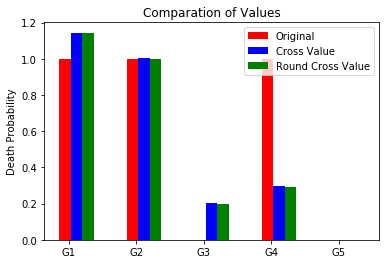

In [7]:
import matplotlib.pyplot as plt
def plotCompare(Original,prediction):
    N = Original.shape[0]
    last = Original.shape[1]-1
    ind = np.arange(N)  # the x locations for the groups
    width = 0.17       # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, Original[:,last], width, color='r')
    rects2 = ax.bar(ind + width, prediction[:,last], width, color='b')
    rects3 = ax.bar(ind + width+width, np.round(prediction[:,last],2), width, color='g')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Death Probability')
    ax.set_title('Comparation of Values')
    ax.set_xticks(ind+ width / last)
    ax.set_xticklabels(('G1', 'G2', 'G3', 'G4','G5','G6'))

    ax.legend((rects1[0], rects2[0], rects3[0]), ('Original', 'Cross Value','Round Cross Value'))

    plt.show()

plotCompare(Original,crossValue)

## Using an independent Implementation from
http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/

Modified by DavidGutierrez
<br><b>R :</b> A matrix to be factorized, dimension N x M
<br><b>K :</b> The number of latent features
<br><b>Steps :</b> The maximum number of steps to perform the optimisation
<br><b>Alpha :</b> The learning rate
<br><b>Beta :</b> The regularization parameter
<br>The final matrices P and Q

In [8]:
def matrix_factorization(R, K = 2, steps=5000, alpha=0.0002, beta=0.02,error = 0.001):
    N = len(R)
    M = len(R[0])
    P = np.random.rand(N,K)
    Q = np.random.rand(K,M)
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
#        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < error:
            break
    return P, Q

In [9]:
nP, nQ = matrix_factorization(Original,K)

In [10]:
nP

array([[ 0.43857224,  1.62109018,  1.57308418],
       [ 0.51702398,  0.91951965,  1.41662595],
       [-0.03500366,  0.71520285,  0.16357548],
       [ 0.27268082, -0.17536622,  0.61242017],
       [ 1.7108098 ,  1.08627132,  0.12711523]])

In [11]:
nQ

array([[ 0.63645214, -0.11296299,  1.76481547,  0.4327517 ],
       [ 1.10933295,  1.00844434,  1.75593909, -0.26747641],
       [ 1.83671029,  0.90207543,  0.43374104,  0.78559351]])

In [12]:
prediction = np.dot(nP,nQ)
print(prediction)

[[ 4.96675887  3.00427736  4.30284586  0.99199422]
 [ 3.95104592  2.14678327  3.14152124  1.09068534]
 [ 1.07156071  0.8727538   1.26502705 -0.07794394]
 [ 1.1038472   0.34479928  0.4389307   0.64602272]
 [ 2.52735897  1.0168535   4.98182497  0.5496648 ]]


In [13]:
np.around(prediction,2)

array([[ 4.97,  3.  ,  4.3 ,  0.99],
       [ 3.95,  2.15,  3.14,  1.09],
       [ 1.07,  0.87,  1.27, -0.08],
       [ 1.1 ,  0.34,  0.44,  0.65],
       [ 2.53,  1.02,  4.98,  0.55]])

In [14]:
Original

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 0],
       [1, 0, 0, 1],
       [0, 1, 5, 0]])

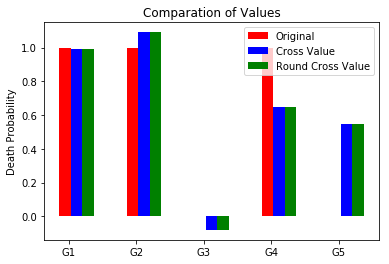

In [15]:
plotCompare(Original,prediction)